# ARROW Python exercises - Activities 7 and 8



**Activity 7 and Activity 8** Using the pandas (and optionally, fileIO and regex) notebooks, Read in your spectra files (plot them out as a coarse check. 

OPTIONALLY, read in the background spectra and subtract this from the data spectra. 

Calculate radial velocity information and write out new, (optionally background subtracted) files that now have velocity information - and include the original header information for use in a later excercise.

HINT: You'll need to read the header lines in using ordinary Python FileIO. Later you'll use ordinary FiliIO to write these to a new file then APPEND the modified dataframe to this as comma delimited data. (use pandas .to_csv() with "mode='a'"

OPTIONALLY, You could put all this within a loop, reading file name input from a file and process all the files you have at once. If you take this approach, displaying spectra would probably be a waste of time.


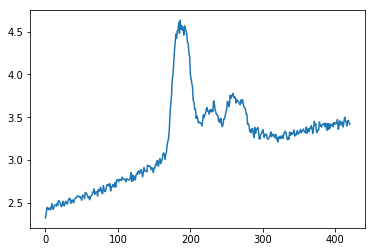

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import re

number_header_lines=12

#file_name = input('Enter spectrum file name ')
file_name = '080-orig.csv' # For debugging purposes to save typing

# First get 'header' lines - there are 12 of them we'll
# Add these back on to our modified CSV later
with open(file_name) as f:
#    header_lines = [f.readline().strip() for x in range(number_header_lines)]
    header_lines = [f.readline() for x in range(number_header_lines)]

# Read in the rest of the data
spectrum_df = pd.read_csv(file_name, header=number_header_lines)
plt.plot(spectrum_df['intensity'])

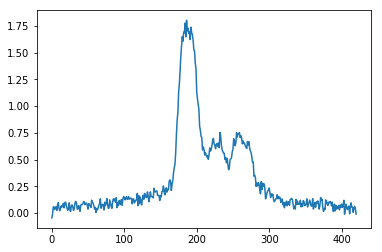

In [86]:
# OPTIONAL Read in the background spectra, average and subtract from the spectrum
# Here we use  'hard-wired' file names but you could use a file list, or manually enter them
bg1 = pd.read_csv('bg1.csv', header=number_header_lines)
bg2 = pd.read_csv('bg2.csv', header=number_header_lines)
bg3 = pd.read_csv('bg3.csv', header=number_header_lines)

# Compute average 'intensity' values
bg_av = (bg1['intensity']+bg2['intensity']+bg3['intensity'])/3

# Subract from spectrum 'intensity'
spectrum_df['intensity'] = spectrum_df['intensity']-bg_av.values

plt.plot(spectrum_df['intensity'])

In [87]:
# Function to convert frequency to radial velocity. Normally expect this to be pleaced at the
# start of the program

from astropy import constants as const

def freq_to_vel(freq, f0=1420.4e6):
    ''' Takes a frequency value (or Pandas dataframe column) and returns
    a velocity value (or new dataframe column of values). f0 is the rest
    frequency and defaults to 1420.4 MHz'''
    
    # We need a value for 'c' - speed of light. Either just do it here or, neatly, use the 
    # astropy 'constants'
    
    # c = 299792458.0  #m/s
    c = const.c
    v = -c*(freq)/(freq+f0)
    return v/1000 #(km/s)                          

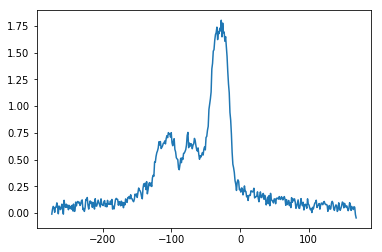

In [88]:
# Convert frequency to radial velocity values using this function
spectrum_v = freq_to_vel(spectrum_df['frequency'])

# New df with column name changed to reflect unit change
spectrum_df_v = spectrum_df.rename(index=str, columns={'frequency': 'velocity'})
# Replace frequency values with velocity values
spectrum_df_v['velocity'] = spectrum_v

# Plot it out as a check.
plt.plot(spectrum_df_v['velocity'], spectrum_df_v['intensity'])
plt.xlabel('Radial Velocity (km/s)')
plt.ylabel('Intensity')


Finally, write it out to a file.


In [89]:
# OPTIONAL A simple function to generate a new name for the velocity/intensity file.
# Could just prompt user for a new name.
def gen_file_name(f_name):
    ''' Just adds "-vel" to file name before ".csv"'''
    return f_name.replace(".", "-vel.")

In [103]:
new_file_name = gen_file_name(file_name)

# First write header lines we read in earlier to the file
with open(new_file_name, "w") as f:
    f.writelines(header_lines)
    
# Now append the modified csv data
spectrum_df_v.to_csv(new_file_name, index=False, mode='a')